<a href="https://colab.research.google.com/github/kekecatf/Colab/blob/main/MakineOdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

In [2]:
# MNIST veri setini yükle
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Veriyi normalize et
y = mnist.target.astype(int)  # Hedef etiketler

print(f"Veri Boyutu: {X.shape}")

Veri Boyutu: (70000, 784)


In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"PCA ile Boyutlandırılmış Veri Boyutu: {X_pca.shape}")

PCA ile Boyutlandırılmış Veri Boyutu: (70000, 2)


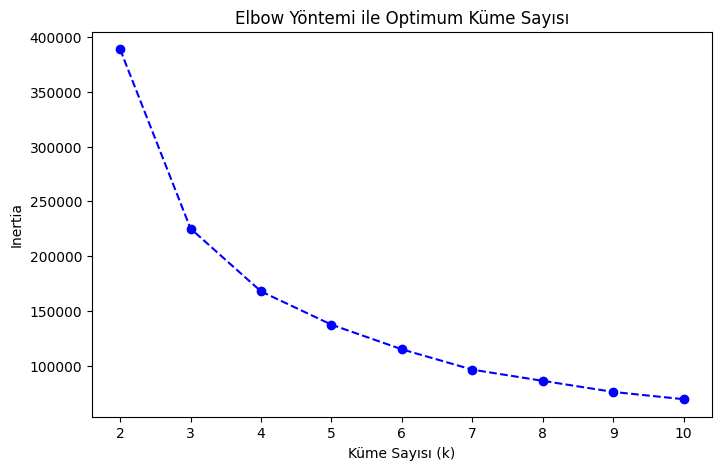

In [4]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Optimum Küme Sayısı')
plt.show()

In [5]:
optimal_k = 4  # Elbow grafiğinden seçilen değer
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Skoru (k={optimal_k}): {silhouette_avg:.2f}")

Silhouette Skoru (k=4): 0.40


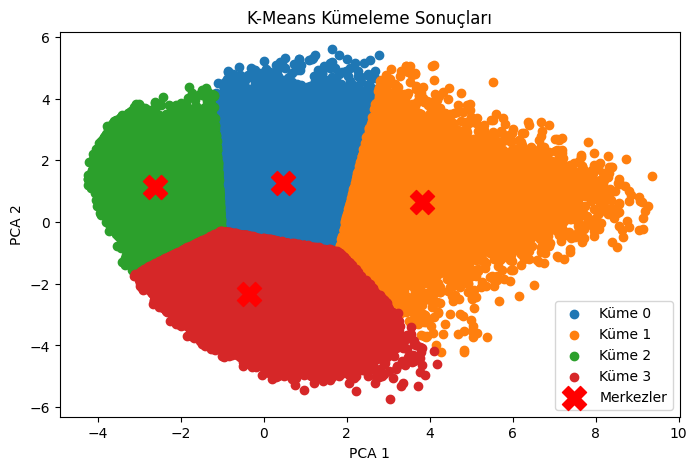

In [6]:
plt.figure(figsize=(8, 5))
for i in range(optimal_k):
    plt.scatter(
        X_pca[labels == i, 0],
        X_pca[labels == i, 1],
        label=f'Küme {i}'
    )

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Merkezler', marker='X')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Kümeleme Sonuçları')
plt.legend()
plt.show()

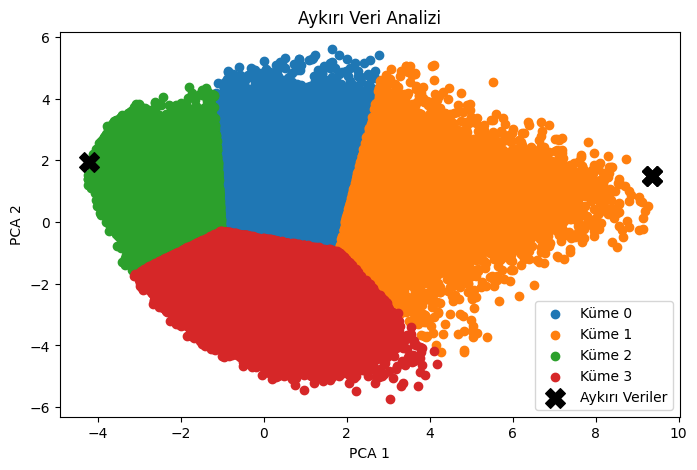

In [7]:
from scipy.spatial.distance import cdist

distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')
outliers = np.argmax(distances, axis=0)

plt.figure(figsize=(8, 5))
for i in range(optimal_k):
    plt.scatter(
        X_pca[labels == i, 0],
        X_pca[labels == i, 1],
        label=f'Küme {i}'
    )

plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1],
            s=200, c='black', marker='X', label='Aykırı Veriler')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Aykırı Veri Analizi')
plt.legend()
plt.show()